## The purpose of this file
Detect the significant ties, or backbone, and save it in graphml format.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import networkx as nx
import toolbox as tb

In [2]:
tag = "campaign"
hashtag = "キャンペーン" 
timespan = "21-22"
tau = 90
G = nx.read_graphml(f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml')

In [3]:
hashtags = list(G.nodes())
ST = tb.STdetection(G, tau, f'../data/ML_estimate/{tag}/{timespan}_{tau}_krylov.npy')

In [4]:
ST.estimate.shape[0] == len(hashtags)
hashtags == ST.nodelist

True

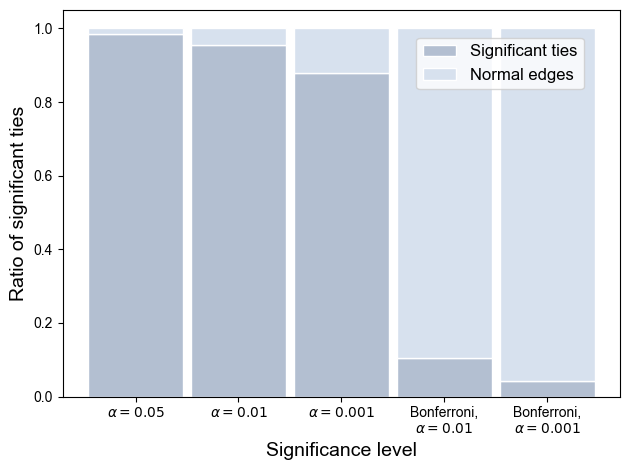

CPU times: total: 2min 2s
Wall time: 2min 6s


In [5]:
%%time
fname=f"../data/figure/ratioST/ratioST_{tag}_{timespan}_{tau}.pdf"
print(fname)
#ST.show_ratio_ST(fname=fname)
ST.show_ratio_ST(ST_col='#b3bfd1', Normal_col='#d7e1ee', fname=fname)

In [5]:
%%time
fname = f'../data/graph_data/{tag}/backbone/{hashtag}_{timespan}_{tau}_backbone'
result = ST.turn_graph(fname=fname)

In [6]:
result

In [7]:
B001, B0001 = result[0], result[-1]

In [8]:
B001.number_of_nodes(), B001.number_of_edges()

(6169, 28045)

In [9]:
B0001.number_of_nodes(), B0001.number_of_edges()

(3047, 10934)

In [10]:
B0001.number_of_edges() / G.number_of_edges(), B0001.number_of_edges(), G.number_of_edges()

(0.04103045199542188, 10934, 266485)